# PC5228 Analysis

In this file I will do the analysis of the results of Mach-Zehnder interferometer-like Quantum circuit from `PC5228_data_generation.ipynb`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit

First, let us plot the counts (more beautifully this time).

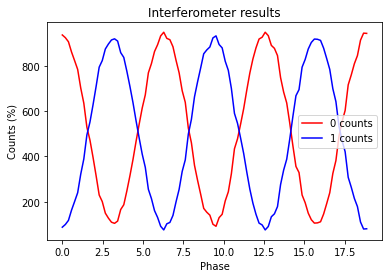

In [2]:
steps = 100
phases = np.linspace(0, 6*np.pi, num=steps)
counts_0 = np.loadtxt('counts_0.txt')
counts_1 = np.loadtxt('counts_1.txt')

plt.plot(phases, counts_0, 'r', label='0 counts')
plt.plot(phases, counts_1, 'b', label='1 counts')
plt.title('Interferometer results')
plt.xlabel('Phase')
plt.ylabel('Counts (%)')
plt.legend(loc='best')
plt.show()

Truly, a plot worthy of praise. Now let us turn our attention to the interferometric visibility (see [here](https://en.wikipedia.org/wiki/Interferometric_visibility) for more information), which can be expressed as

$$
\nu = \frac{I_{max} - I_{min}}{I_{max} + I_{min}}
$$

For a Mach-Zehnder interferometer, this value should ideally be 1 as $I_{min} = 0$ and $I_{max} = 1$. However, we do not live in Plato's idealistic world and our data is noisy and dirty, and thus will not yield such a perfect, integer value.

In [3]:
def visibility(counts):
    max_counts = max(counts)
    min_counts = min(counts)
    return (max_counts - min_counts) / (max_counts + min_counts)

print('Visibility of 0 counts: ', visibility(counts_0))
print('Visibility of 1 counts: ', visibility(counts_1))

Visibility of 0 counts:  0.823076923076923
Visibility of 1 counts:  0.8492063492063492


Let us now investigate this imperfection.

In [15]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel

# Get the simulator
simulator = Aer.get_backend('qasm_simulator')

IBMQ.save_account('a4672f03a285b3dc8d9a691a29fb0f2a5bdcc6227d81b073ebec004d7ed7419c7549f68ce21a2cf685575d5f5a2969770a7f0ef4766a6aba0896649d464e2080', overwrite=True)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_armonk')
noise_model = NoiseModel.from_backend(backend)
# Variables for later use
sim_counts_0 = []
sim_counts_1 = []

for phase in phases:
    # Construct the Mach-Zehnder interferometer
    mzint = QuantumCircuit(1,1)
    mzint.h([0])
    mzint.p(phase, 0)
    mzint.h([0])
    mzint.measure(0, 0)
    
    # Run it on the simulator
    job = execute(mzint, simulator, shots=1024, noise_model=noise_model)
    result = job.result()

    counts = result.get_counts(mzint)
    
    try:
        sim_counts_0.append(counts['0'])
    except KeyError:
        sim_counts_0.append(0)
        
    try:
        sim_counts_1.append(counts['1'])
    except KeyError:
        sim_counts_1.append(0)

ibmqfactory.load_account:WARNING:2021-10-04 04:29:04,730: Credentials are already in use. The existing account in the session will be replaced.


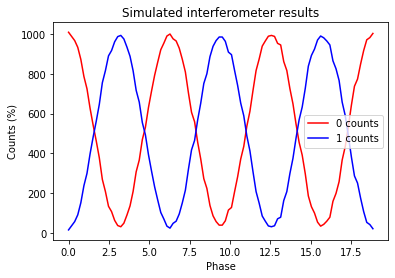

In [16]:
plt.plot(phases, sim_counts_0, 'r', label='0 counts')
plt.plot(phases, sim_counts_1, 'b', label='1 counts')
plt.title('Simulated interferometer results')
plt.xlabel('Phase')
plt.ylabel('Counts (%)')
plt.legend(loc='best')
plt.show()